In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('final_output.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,5,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,5,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,5,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,5,2,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,12,3,2,0,2,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,11,5,2,1,2,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,13,5,1,0,3,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,13,5,3,0,2,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,10,5,2,1,3,10.0,0,0,0


LOGISTIC REGRESSION

In [3]:
X = df.iloc[:, 1:16]
Y = df.iloc[:,0]

In [4]:
best_feat = SelectKBest(score_func = chi2, k = 3)
fit = best_feat.fit(X, Y)

In [5]:
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X.columns)

In [6]:
feat_scores = pd.concat([cols, scores], axis = 1)
feat_scores.columns = ['Feature', 'Score']
feat_scores.sort_values(by = 'Score')

,Feature,Score
13,SleepTime,6.442351
9,Race,41.936147
2,AlcoholDrinking,306.693270
14,Asthma,475.647835
10,Diabetic,627.829529
11,PhysicalActivity,718.810142
7,Sex,823.195671
0,BMI,1224.020726
1,Smoking,2181.953023
5,MentalHealth,4243.691008


In [7]:
XX = df[['PhysicalHealth', 'AgeCategory', 'Stroke']]
YY = df[['HeartDisease']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.3, random_state = 100)

In [9]:
#feature scaling

st_x = StandardScaler()
x_train = st_x.fit_transform(X_train)
x_test = st_x.transform(X_test)

In [10]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
y_pred = logreg.predict(x_test)
print(x_test)
print(y_pred)

[[-0.42382717 -1.5454705  -0.1971582 ]
 [-0.42382717 -1.26499116 -0.1971582 ]
 [-0.42382717  0.1374055  -0.1971582 ]
 ...
 [-0.42382717 -1.26499116 -0.1971582 ]
 [ 0.45604165  0.69836417 -0.1971582 ]
 [-0.04674053  0.9788435  -0.1971582 ]]
[0 0 0 ... 0 0 0]


Evaluation

In [12]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.913976589291112
Recall:  0.04112893498974792
Precision: 0.5295031055900621
CL Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.95     87648
           1       0.53      0.04      0.08      8291

    accuracy                           0.91     95939
   macro avg       0.72      0.52      0.52     95939
weighted avg       0.88      0.91      0.88     95939



ROC Curve

In [13]:
y_pred_proba = logreg.predict_proba(x_test) [::, 1]

In [14]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [15]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

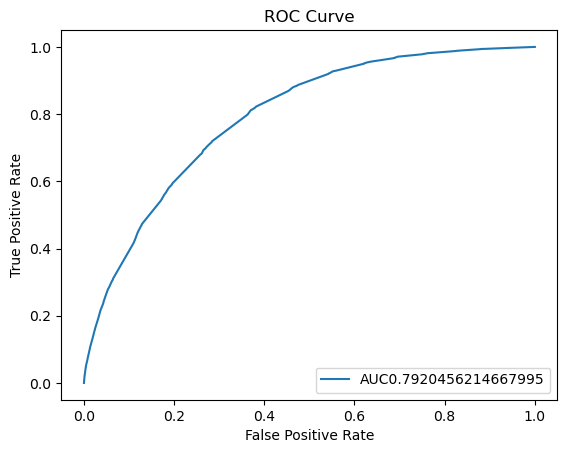

In [16]:
plt.plot(false_positive_rate, true_positive_rate, label = "AUC" + str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)

In [17]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[87345,   303],
       [ 7950,   341]], dtype=int64)

In [18]:
#Hyperparameter tuning

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'lbfgs', 'newton-cg']
}

In [19]:
model = LogisticRegression()

In [20]:
model_grid = GridSearchCV(model, param_grid, scoring = 'recall', cv = 5)

In [21]:
model_grid = model_grid.fit(X_train, y_train)

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [22]:
best_params = model_grid.best_params_
best_model = model_grid.best_estimator_

In [23]:
best_params

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [24]:
best_model

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [25]:
predictor = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
predictor.fit(x_train, y_train)

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [26]:
y_pred1 = predictor.predict(x_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred1))
print('Recall: ', metrics.recall_score(y_test, y_pred1, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred1, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred1, zero_division = 1))

Accuracy:  0.913976589291112
Recall:  0.04112893498974792
Precision: 0.5295031055900621
CL Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.95     87648
           1       0.53      0.04      0.08      8291

    accuracy                           0.91     95939
   macro avg       0.72      0.52      0.52     95939
weighted avg       0.88      0.91      0.88     95939



In [27]:
report = classification_report(y_test, y_pred1)

print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     87648
           1       0.53      0.04      0.08      8291

    accuracy                           0.91     95939
   macro avg       0.72      0.52      0.52     95939
weighted avg       0.88      0.91      0.88     95939



In [28]:
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[87345,   303],
       [ 7950,   341]], dtype=int64)

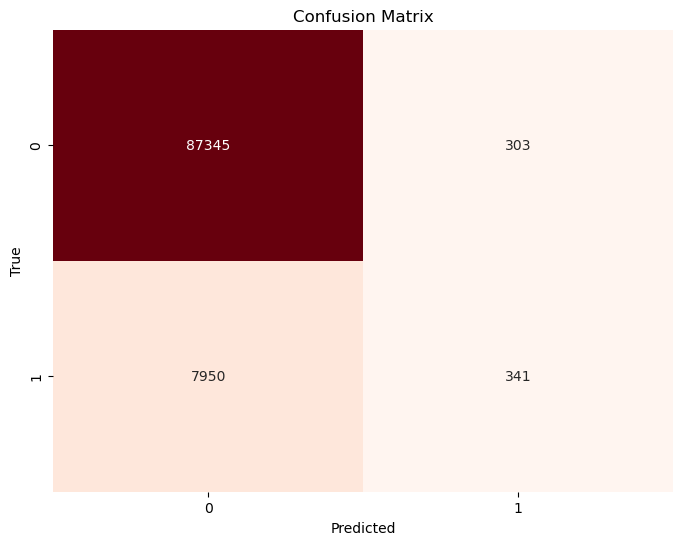

In [29]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()